In [4]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Importing the data
df = pd.read_csv('Babatunde Score.xls')

In [6]:
# Check the head of the data
df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [7]:
# Check the info() and describe() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [9]:
# Check for missing values
df.isnull().sum()

Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight             802
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             1450
Store_Location_Type       0
Store_Type                0
Item_Store_Returns        0
dtype: int64

In [7]:
# Filling missing values
# There are missing values in the Item_Weight and the Store_Size. It will be filled with the mode of the feature.

In [10]:
df['Item_Weight'].describe()

count    4188.000000
mean       12.908838
std         4.703256
min         4.555000
25%         8.767500
50%        12.600000
75%        17.100000
max        21.350000
Name: Item_Weight, dtype: float64

In [11]:
df['Item_Weight'] = df['Item_Weight'].fillna(12.9)

In [12]:
df['Store_Size'].value_counts()

Medium    1582
Small     1364
High       594
Name: Store_Size, dtype: int64

In [13]:
df['Store_Size'] = df['Store_Size'].fillna('Medium')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4990 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           4990 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


# EDA

Time to visualize the data for some insights.

<AxesSubplot:xlabel='Store_Size', ylabel='count'>

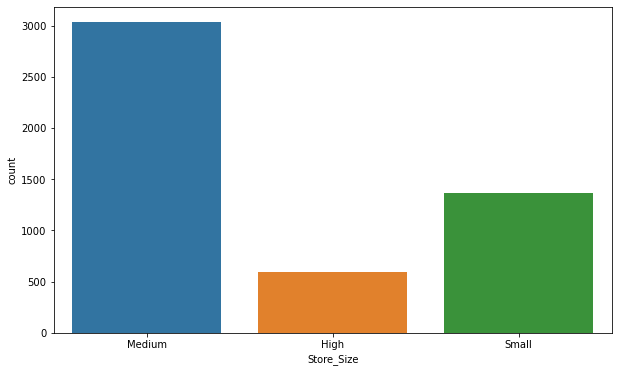

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(x='Store_Size',data=df)

Based on this, most of the stores have a medium store size

In [15]:
# Finding the age of each store
df['Store_Age'] = 2021 -df['Store_Start_Year']
df

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,Store_Age
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.60,Low Sugar,0.068535,Soft Drinks,357.54,2005,Medium,Cluster 3,Grocery Store,709.08,16
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.60,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,27
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.60,Low Sugar,0.041178,Soft Drinks,350.79,2014,Medium,Cluster 2,Supermarket Type1,6381.69,7
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.60,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,5
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.60,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,NCZ54,BABATUNJI019,NCZ54_BABATUNJI019,12.90,Low Sugar,0.145952,Household,402.39,1992,Small,Cluster 1,Grocery Store,406.14,29
4986,NCZ54,BABATUNJI027,NCZ54_BABATUNJI027,12.90,Low Sugar,0.082956,Household,410.14,1992,Medium,Cluster 3,Supermarket Type3,13808.69,29
4987,NCZ54,BABATUNJI045,NCZ54_BABATUNJI045,14.65,Low Sugar,0.083528,Household,406.14,2009,Medium,Cluster 2,Supermarket Type1,5685.93,12
4988,NCZ54,BABATUNJI046,NCZ54_BABATUNJI046,14.65,Low Sugar,0.083359,Household,404.89,2004,Small,Cluster 1,Supermarket Type1,11778.00,17


<AxesSubplot:xlabel='Store_Age', ylabel='Item_Store_Returns'>

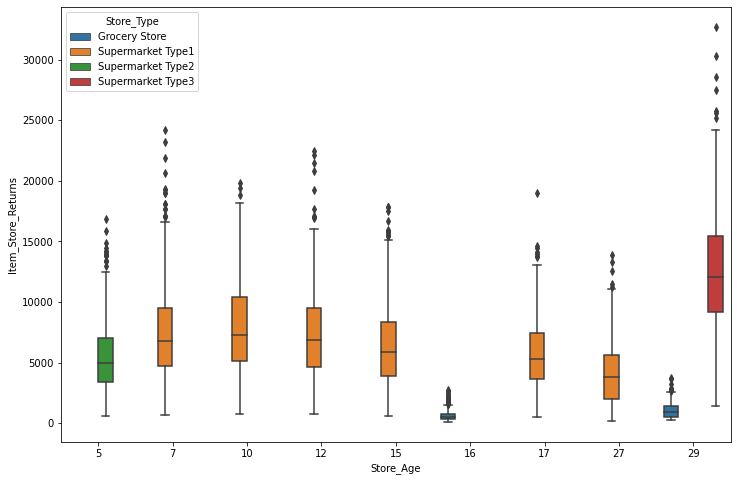

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Store_Age', y='Item_Store_Returns', hue='Store_Type', data=df)

It can be infered from the data set that supermarket type 3 has the highest store returns,although the store age doesnt really have a trend has we can see for the store age 15.8 and 28 that they have low store returns

<AxesSubplot:xlabel='Store_Location_Type', ylabel='Item_Store_Returns'>

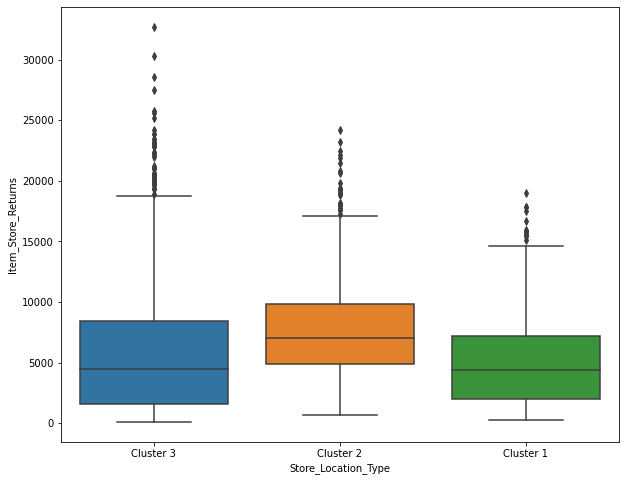

In [17]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Store_Location_Type',y='Item_Store_Returns', data=df)

It can infered from the dataset that stores located in cluster 3 had more sales followed by cluster 2, then cluster 1,

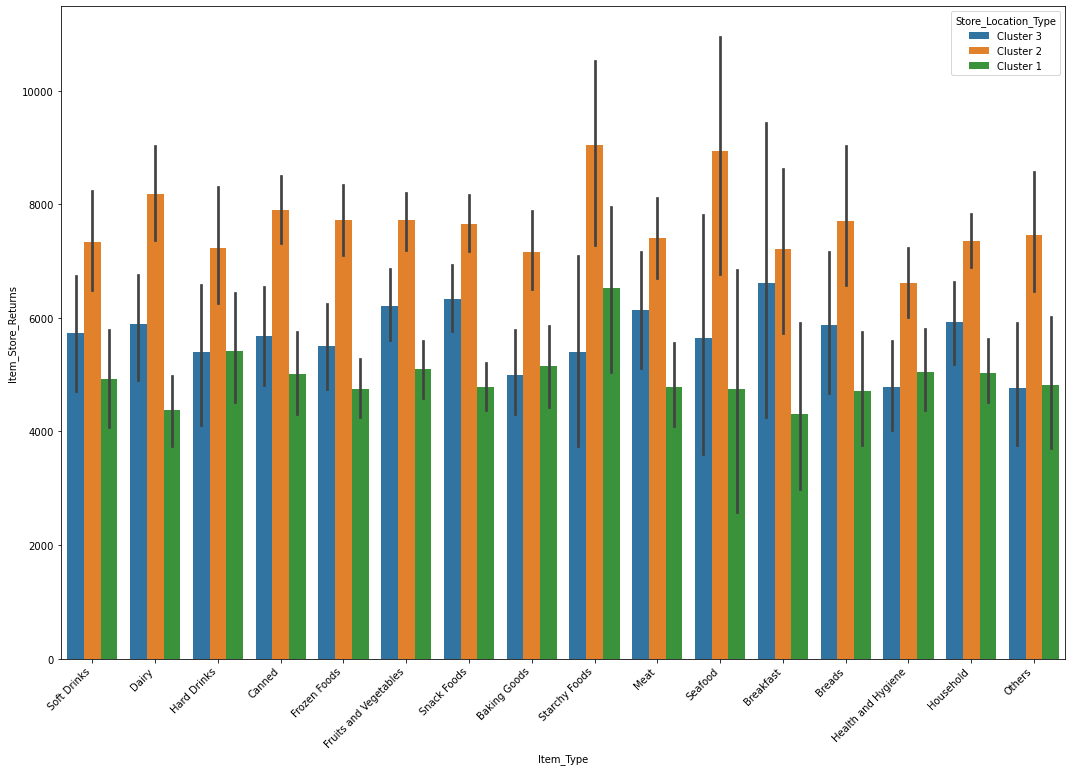

In [21]:
plt.figure(figsize=(18,12))
sns.barplot(x='Item_Type', y='Item_Store_Returns',hue='Store_Location_Type', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

It can be inferred from the above graph that starchy foods has the highest for cluster 2 and 1 and breakfast food in cluster 3 has the hishest store returns

<AxesSubplot:xlabel='Store_Size', ylabel='Item_Store_Returns'>

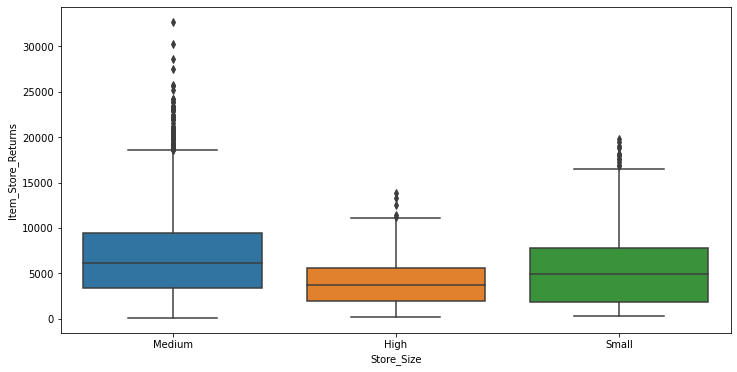

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Store_Size', y='Item_Store_Returns', data=df)

It can be infered from the above graph that medium store size has the highest sale followed by the small then the high store size

In [22]:
df['Store_ID'].value_counts()

BABATUNJI049    620
BABATUNJI013    594
BABATUNJI017    583
BABATUNJI035    515
BABATUNJI046    509
BABATUNJI018    500
BABATUNJI045    483
BABATUNJI027    462
BABATUNJI010    384
BABATUNJI019    340
Name: Store_ID, dtype: int64

In [25]:
Stores = df.groupby('Store_ID')

In [26]:
Stores.sum()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns,Store_Age
Store_ID,,,,,,
BABATUNJI010,4945.965,39.398329,104234.38,769920,240638.60,6144
BABATUNJI013,7609.240,34.949318,151975.79,1184436,2407829.22,16038
BABATUNJI017,7535.455,35.107191,259352.45,1174162,4370201.60,4081
BABATUNJI018,6494.185,30.564383,192849.77,1008000,2770310.84,2500
BABATUNJI019,4386.000,37.774849,149500.22,677280,357844.32,9860
BABATUNJI027,5959.800,27.267124,219606.99,920304,5803269.64,13398
BABATUNJI035,6729.230,31.194159,237277.16,1035665,4058828.52,5150
BABATUNJI045,6129.155,29.444659,226543.31,970347,3567311.83,5796
BABATUNJI046,6597.860,30.213267,181327.58,1020036,2945704.10,8653


In [27]:
Stores['Item_Store_Returns'].sum()

Store_ID
BABATUNJI010     240638.60
BABATUNJI013    2407829.22
BABATUNJI017    4370201.60
BABATUNJI018    2770310.84
BABATUNJI019     357844.32
BABATUNJI027    5803269.64
BABATUNJI035    4058828.52
BABATUNJI045    3567311.83
BABATUNJI046    2945704.10
BABATUNJI049    3934626.95
Name: Item_Store_Returns, dtype: float64

C:\Users\ANGEL GAD\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ANGEL GAD\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


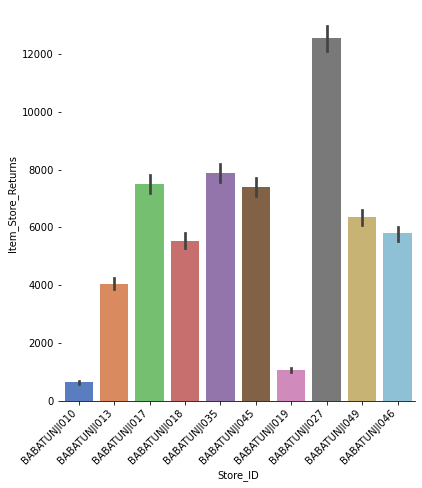

In [20]:
g = sns.factorplot(x="Store_ID",y="Item_Store_Returns",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
plt.xticks(rotation=45,ha='right')
plt.show()

from the above plot an intuition that can be goten is that store babatunji027 has the highest store sale and its is really high relatively to the other store type so it can be investigated to see what they are doing right maybe its the type of food they sell that makes this so or the location or otherwise.

<AxesSubplot:xlabel='Store_Location_Type', ylabel='Item_Store_Returns'>

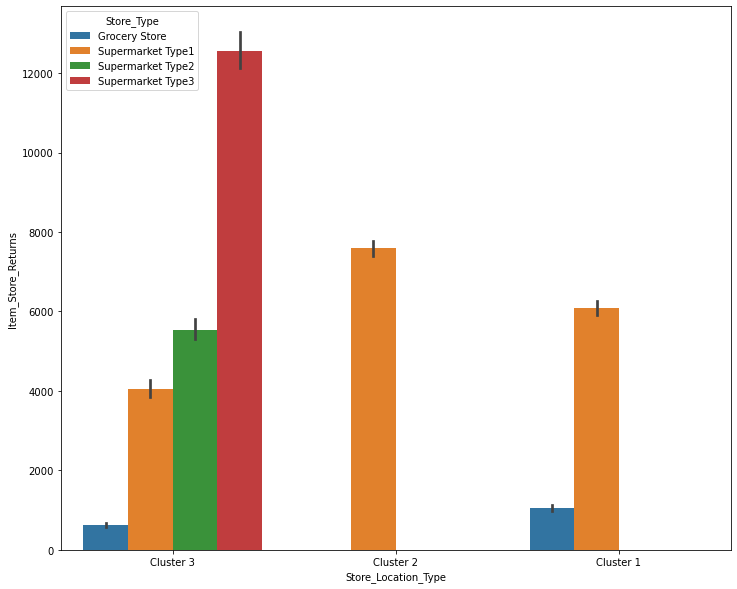

In [71]:
plt.figure(figsize=(12,10))
sns.barplot(x='Store_Location_Type', y='Item_Store_Returns',hue='Store_Type', data=df)

plotting the store location type to the store returns on different clusters we can see from the plot that cluster 3 is doing pretty well on sales.

# RECCOMENDATIONS

BABATUNJI STORES ACTUALLY WANTS TO EXPAND AND THERE ARE SEVERAL FEATURES FROM THE DATA GIVEN THAT AS GIVEN ME AN INTUITION HAS TO HOW TO HELP YOU WITH THIS SOLUTION,WE CAN MAKE MORE STORES CLUSTER 3 TYPE WITH MEDIUM SIZE AND MORE STARCHY FOODS SHOULD BE SUPPLIED HAS CUSTOMERS SEEMS TO BUY MORE STARCHY FOODS AND WE CAN ALSO LOOK INTO babatunji027 TO SEE WHAT THEY ARE DOING RIGHT.
THANK YOU!!!